In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2

In [2]:
input_path = 'C:\\Users\\sinad\\Dropbox (Gladstone)\\Feature_based_classification\\ten-crops-somas-vs-neurites'

In [3]:
img_list = os.listdir(input_path)

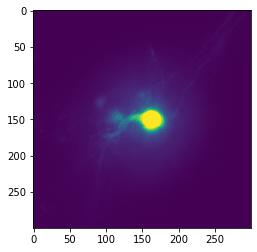

In [4]:
current_img_path = os.path.join(input_path, img_list[7])
current_img = cv2.imread(current_img_path, 0)
plt.imshow(current_img)

In [5]:
row, col = current_img.shape
print("the row and col are: ", row, col)

the row and col are:  300 300


In [6]:
centerRow, centerCol = int(row/2), int(col/2)
print("center row and col are: ", centerRow, centerCol)

center row and col are:  150 150


In [7]:
centerRectangle = 10

[[107.22584  126.1726   122.84033  ... 114.69084  122.84033  126.1726  ]
 [132.49026  130.57204  131.31528  ... 120.296234 121.127426 114.59034 ]
 [127.66628  132.00815  120.38528  ... 110.85983  100.31874  111.89126 ]
 ...
 [122.33536   97.39325  115.993454 ... 131.16806  118.22365  116.75388 ]
 [127.66628  111.89126  100.31874  ... 118.40411  120.38528  132.00815 ]
 [132.49026  114.59034  121.127426 ... 125.31206  131.31528  130.57204 ]]
123.81508


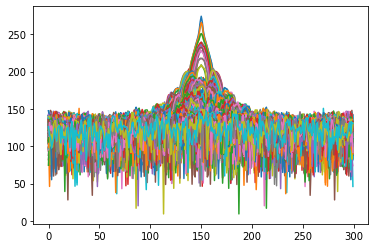

In [8]:
# imgAngle = np.angle(imgFFT2)
# print("img fft angle is: ", imgAngle)
dft = cv2.dft(np.float32(current_img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
imgMagnitude = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
print(imgMagnitude)
plt.plot(imgMagnitude)
print(np.median(imgMagnitude))

In [9]:
# power calculations
power = imgMagnitude**2
median_pow = np.median(power.ravel())
print(power.ravel())
print(median_pow)

[11497.38  15919.525 15089.747 ... 15703.111 17243.701 17049.057]
15330.174


In [10]:
# high pass filtering
dft_shift[centerRow - centerRectangle: centerRow + centerRectangle,
            centerCol - centerRectangle: centerCol + centerRectangle] = 0

dft_i_shift = np.fft.ifftshift(dft_shift)
# print(dft_i_shift)
# plt.imshow(np.abs(FFT2shift))

9512903000.0
[4.9137306e+09 5.0508636e+09 5.2578135e+09 ... 4.9095967e+09 4.9670538e+09
 5.1354189e+09]


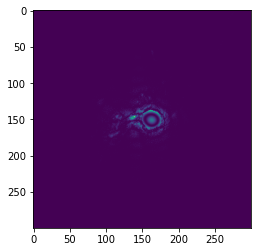

In [11]:
# Inverse Transfer to show the image
img_back = cv2.idft(dft_i_shift)
img_back = (cv2.magnitude(img_back[:,:,0], img_back[:,:,1]))**2
median_img_back = np.median(img_back.ravel())
print(median_img_back)
print(img_back.ravel())
plt.imshow(img_back)
#
# img_HPF_iFFT_shift = np.fft.ifftshift(imgFFT_shift_HPF)
# img_back = cv2.idft(img_HPF_iFFT_shift)
# img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
# img_LPF_iFFT_mag = np.abs(img_LPF_iFFT)
# print(img_back)
# plt.imshow(img_back)